# Problem Statement

In this project, the goal is to develop a regression model to accurately predict the insurance costs for individual customers based on their demographic and lifestyle attributes. The dataset includes critical factors such as age, BMI, number of children, smoking status, gender, and geographic region, which all contribute to the overall cost of insurance. By building this predictive model, the insurance company can assess risk more accurately, personalize premium pricing, and optimize its pricing strategy, ensuring both competitiveness in the market and profitability. The model will also help identify the key factors that significantly influence insurance costs, enabling targeted customer engagement and risk mitigation strategies.

<center><img src="https://www.canarahsbclife.com/content/dam/choice/blog-inner/images/what-is-insurance-meaning-and-benefits-of-insurance.jpg" width=500/></center>

**Content**  
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.



**Dataset Description:**  
- `age`: Age of the customer (numerical value)

- `sex`: Sex of the customer (Male/Female)

- `bmi`: Bmi ratio of the customer (numberical value)

- `children`: Number of childern (numerical value)

- `smoker`: Is the customer smokes or not (Yes/No)

- `Region`: where did customer located (southeast, southwest, northeast, northwest)
- `expenses`: total medical expenses charged to the individual policyholder


# STEP 1: Import Necessary Libraries & Modules

In [106]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import os

# STEP 2: Read Dataset from Google Drive

In [107]:
# Read the csv file, treat the first row as header
insurance_df = pd.read_csv("resources/insurance.csv", header=0)


In [108]:
# Check the info of the dataframe
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [109]:
# View the data, top 5 rows
insurance_df.head(5)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


# STEP 3: EDA

Exploratory Data Analysis (EDA) is the process of analyzing and visualizing data to uncover patterns, detect anomalies, test hypotheses, and check assumptions. It helps in understanding the underlying structure of the data before applying modeling techniques.

## 3.1 Check the distribution of `bmi` and list down your observtions


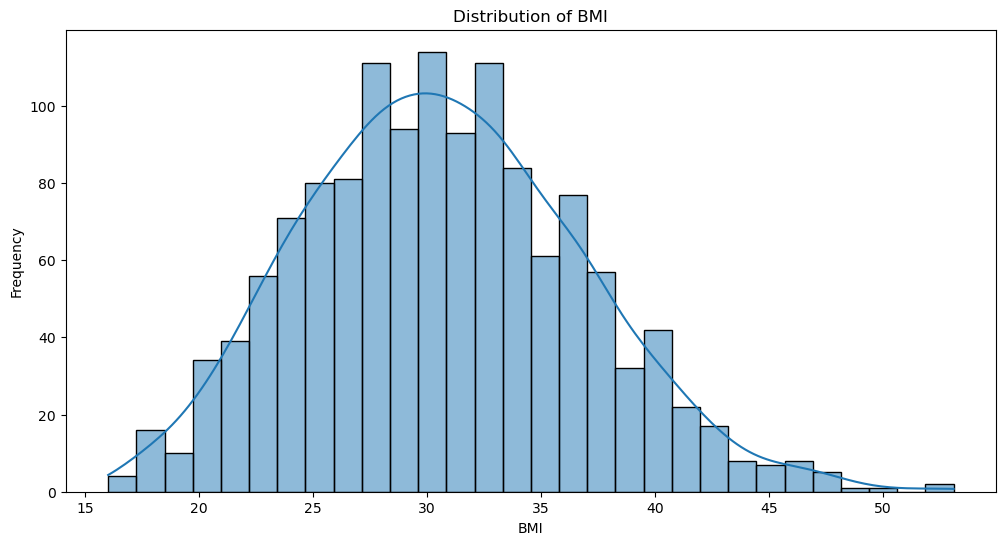

In [110]:
# Create a bmi histogram to see the disribution of bmi
plt.figure(figsize=(12, 6))
sns.histplot(insurance_df['bmi'], bins=30, kde=True)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

# Use histplot from sns library


## 3.2 Find the distribution of all the categorical variables and list down your observations.

*Hint: Use pie chart for this visualization*

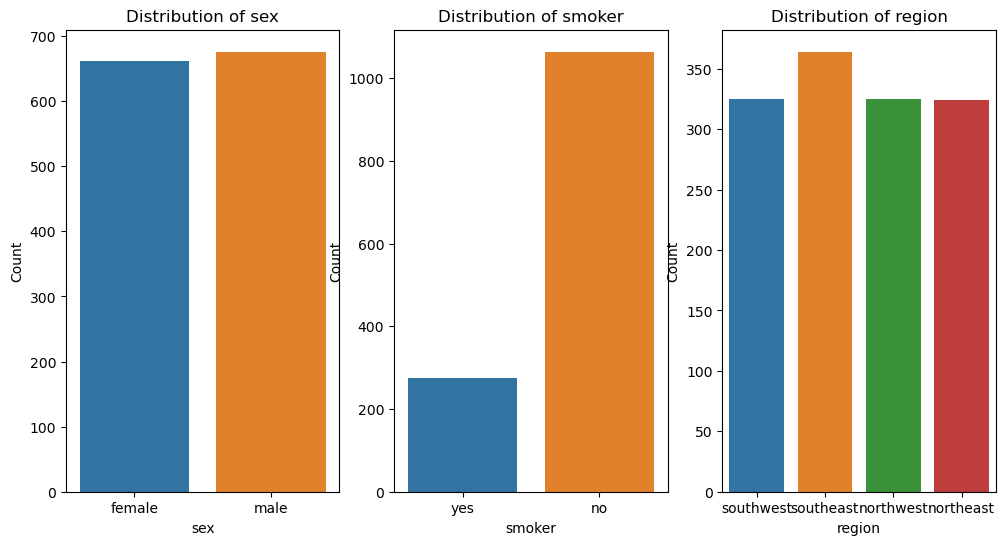

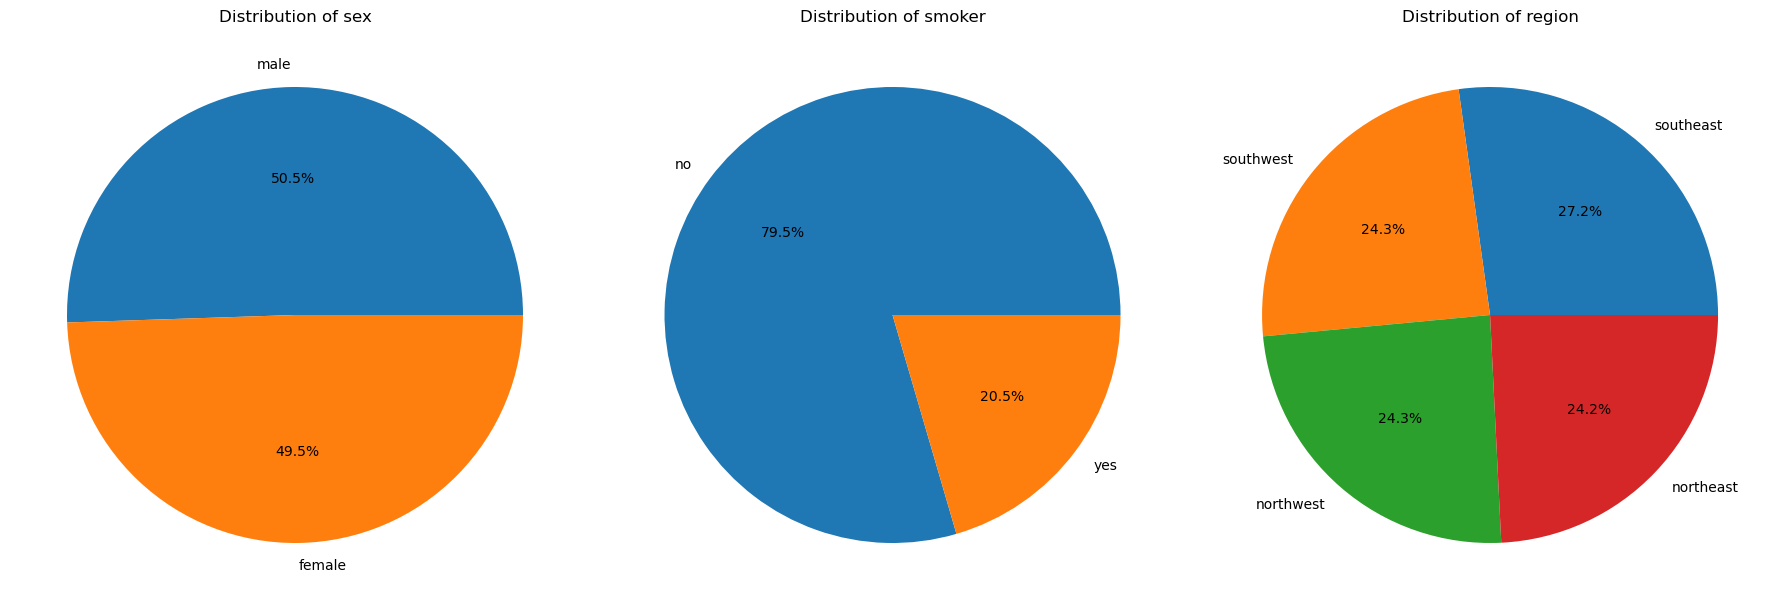

In [111]:
# Visualize the distribution of categorical variables
# Create a list of the categorical columns
categorical_cols = ['sex', 'smoker', 'region']

# Create a subplot with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(12, 6))
for i, col in enumerate(categorical_cols):
    sns.countplot(data=insurance_df, x=col, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
# Generate pie charts for the categorical columns, create a subplot with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for i, col in enumerate(categorical_cols):
    insurance_df[col].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_ylabel('')

# Adjust the layout to avoid overlap
plt.tight_layout()
plt.show()

## 3.3 Check the relationship between the variables `smoker`, `age`, `expenses`

*Hint: Use scatter plot to find the relationship between the variables.*

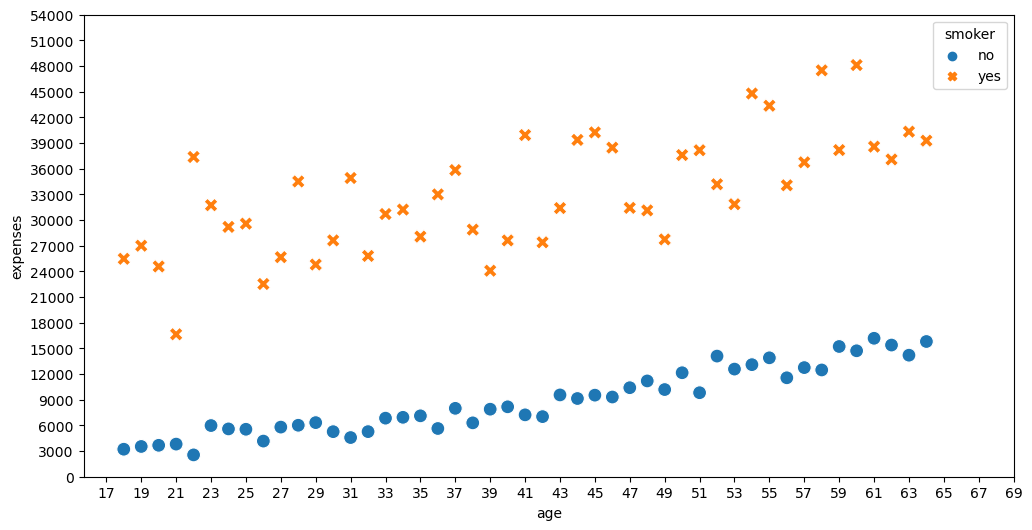

In [112]:
# Checking the relationship between smoker, age, and expenses
# Grouping data by 'smoker' and 'age' to calculate the mean expenses for each group
grouped_data = insurance_df.groupby(['smoker', 'age'])['expenses'].mean().reset_index()
grouped_data.head()

# Setting up the plot
# Creating a scatter plot with 'age' on the x-axis, 'expenses' on the y-axis, and different colors for 'smoker' status
plt.figure(figsize=(12, 6))
sns.scatterplot(data=grouped_data, x='age', y='expenses', hue='smoker', style='smoker', s=100)

# Customizing the y-axis ticks to range from 0 to 55,000 with increments of 3,000
plt.yticks(ticks=range(0, 55001, 3000))

# Customizing the x-axis ticks to range from age 17 to 70 with increments of 2 years
plt.xticks(ticks=range(17, 71, 2))

# Display the plot
plt.show()


## 3.3 Check the relationship between the variables `smoker`, `bmi`, `expenses`

*Hint: Use scatter plot to find the relationship between the variables.*

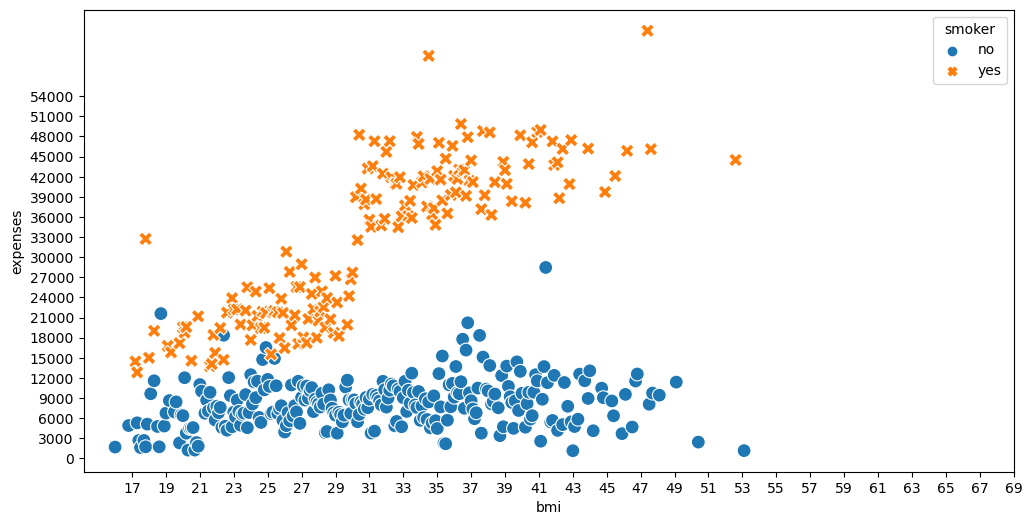

In [113]:
# Checking the relationship between smoker, BMI, and expenses
# Grouping the data by 'smoker' and 'bmi' to calculate the mean expenses for each group
grouped_data = insurance_df.groupby(['smoker', 'bmi'])['expenses'].mean().reset_index()

# Setting up the plot
# Creating a scatter plot with 'bmi' on the x-axis, 'expenses' on the y-axis, and different colors for 'smoker' status
plt.figure(figsize=(12, 6))
sns.scatterplot(data=grouped_data, x='bmi', y='expenses', hue='smoker', style='smoker', s=100)

# Customizing the y-axis ticks to range from 0 to 55,000 with increments of 3,000
plt.yticks(ticks=range(0, 55001, 3000))

# Customizing the x-axis ticks to range from BMI 17 to 70 with increments of 2 units
plt.xticks(ticks=range(17, 71, 2))

# Display the plot
plt.show()


## 3.4 Find the outliers (if any) in the numerical variables

*Hint: Use box plot and calculate IQR to detect the outliers.*

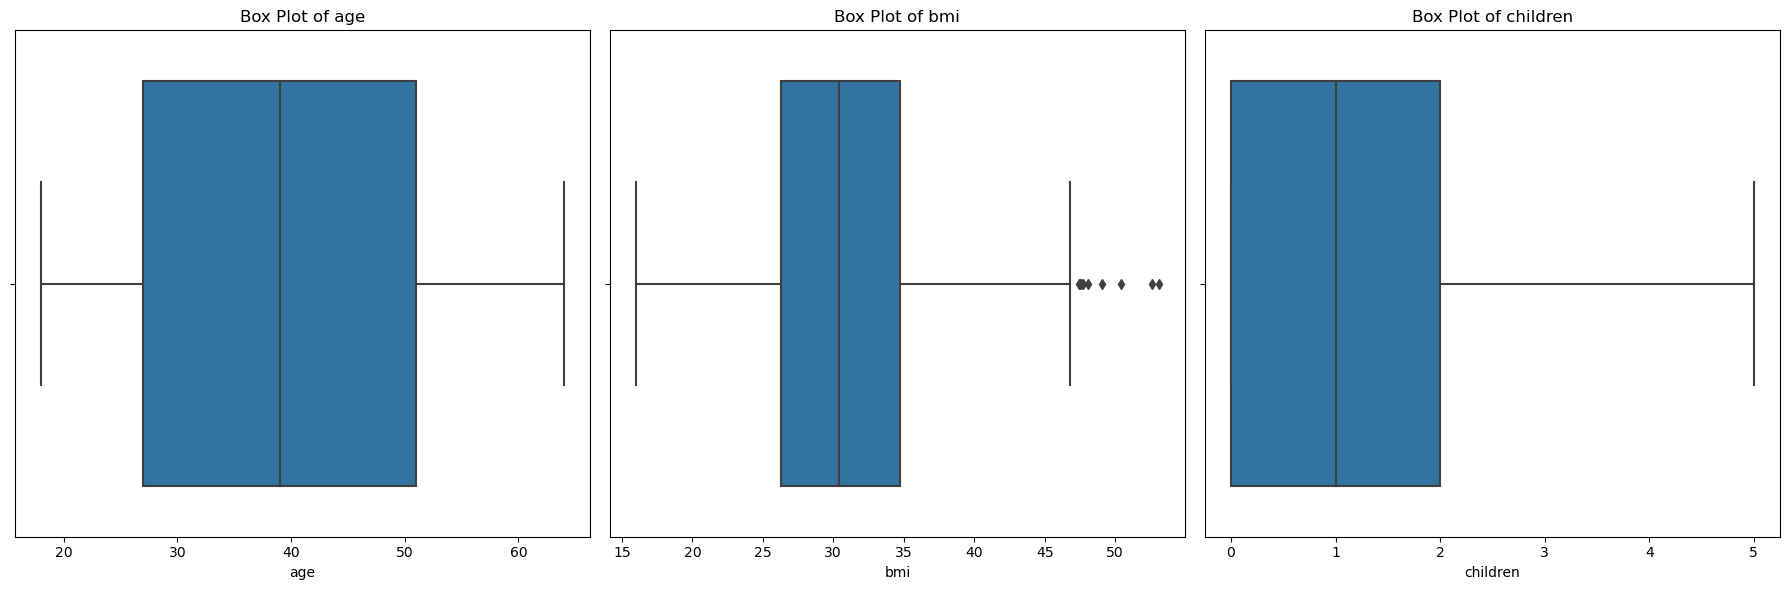

In [114]:
# Identify numerical columns for outlier detection
numerical_cols = insurance_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols.remove('expenses')  # Exclude target variable

# Visualizing Outliers Using Box Plots
plt.figure(figsize=(18, 6))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, len(numerical_cols), i + 1)
    sns.boxplot(data=insurance_df, x=col)
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

Outliers in age:
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, expenses]
Index: []


Outliers in bmi:
      age     sex   bmi  children smoker     region  expenses
116    58    male  49.1         0     no  southeast  11381.33
286    46  female  48.1         2     no  northeast   9432.93
401    47    male  47.5         1     no  southeast   8083.92
543    54  female  47.4         0    yes  southeast  63770.43
847    23    male  50.4         1     no  southeast   2438.06
860    37  female  47.6         2    yes  southwest  46113.51
1047   22    male  52.6         1    yes  southeast  44501.40
1088   52    male  47.7         1     no  southeast   9748.91
1317   18    male  53.1         0     no  southeast   1163.46


Outliers in children:
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, expenses]
Index: []




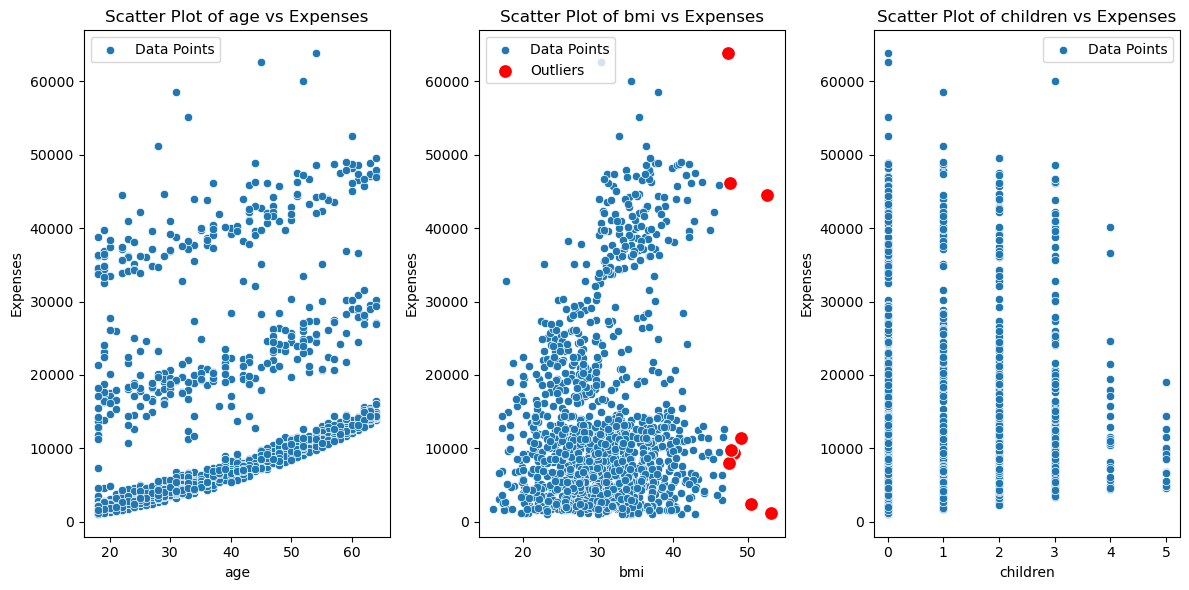

In [115]:
# Identifying Outliers Using the IQR Method
# Initialize a dictionary to store outliers
outliers_dict = {}

for col in numerical_cols:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile) for the column
    Q1 = insurance_df[col].quantile(0.25)
    Q3 = insurance_df[col].quantile(0.75)
    # Compute the Interquartile Range (IQR)
    IQR = Q3 - Q1
    # Define the lower and upper bounds to detect outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Identify outliers that fall outside the lower and upper bounds
    outliers = insurance_df[(insurance_df[col] < lower_bound) | (insurance_df[col] > upper_bound)]
    # Print the detected outliers for each numerical feature
    outliers_dict[col] = outliers

# Print the outliers for each numerical column
for col, outliers in outliers_dict.items():
    print(f"Outliers in {col}:")
    print(outliers)
    print("\n")

# Visualizing Outliers with Scatter Plots
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, len(numerical_cols), i + 1)
    sns.scatterplot(data=insurance_df, x=col, y='expenses', label='Data Points')
    if not outliers_dict[col].empty:
        sns.scatterplot(data=outliers_dict[col], x=col, y='expenses', color='red', label='Outliers', s=100)
    plt.title(f'Scatter Plot of {col} vs Expenses')
    plt.xlabel(col)
    plt.ylabel('Expenses')
    plt.legend()
plt.tight_layout()
# Display the scatter plots with highlighted outliers
plt.show()

## 3.5 Do a complete correlation analysis of the entire data

*Hint: Create dummy variables for all the categorical variables and then use a heatmap to do the correlation analysis.*

                       age       bmi  children  expenses  sex_male  \
age               1.000000  0.109341  0.042469  0.299008 -0.020856   
bmi               0.109341  1.000000  0.012645  0.198576  0.046380   
children          0.042469  0.012645  1.000000  0.067998  0.017163   
expenses          0.299008  0.198576  0.067998  1.000000  0.057292   
sex_male         -0.020856  0.046380  0.017163  0.057292  1.000000   
smoker_yes       -0.025019  0.003968  0.007673  0.787251  0.076185   
region_northwest -0.000407 -0.135992  0.024806 -0.039905 -0.011156   
region_southeast -0.011642  0.270144 -0.023066  0.073982  0.017117   
region_southwest  0.010016 -0.006398  0.021914 -0.043210 -0.004184   

                  smoker_yes  region_northwest  region_southeast  \
age                -0.025019         -0.000407         -0.011642   
bmi                 0.003968         -0.135992          0.270144   
children            0.007673          0.024806         -0.023066   
expenses            0.78725

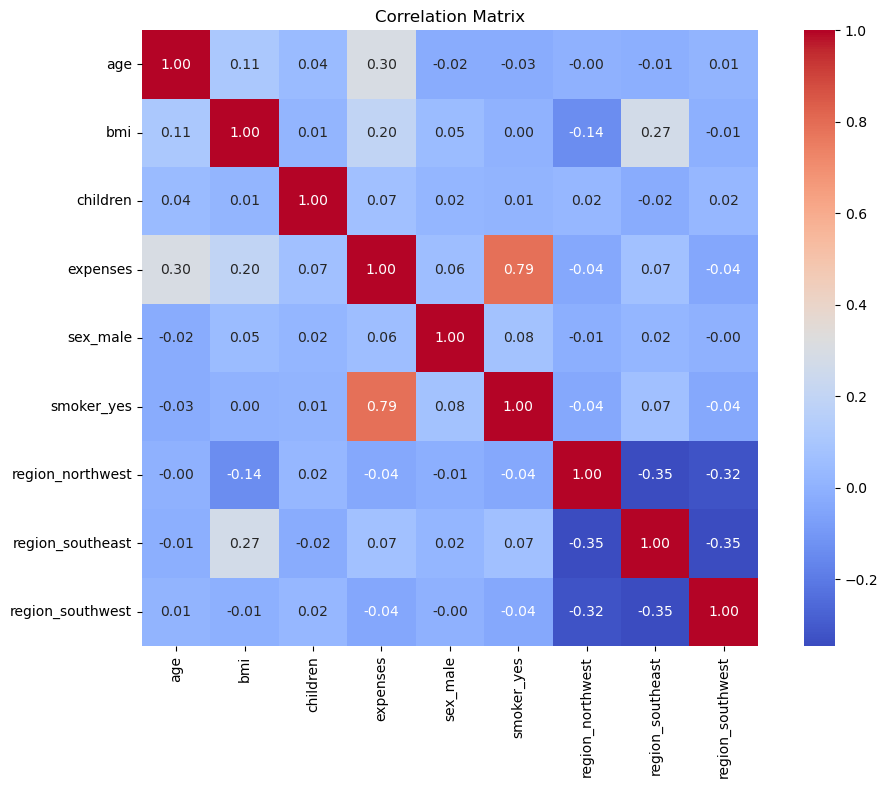

In [116]:
# Identify categorical and numerical columns
numerical_cols = insurance_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = insurance_df.select_dtypes(include=['object']).columns.tolist()
numerical_cols.remove('expenses')  # Exclude target variable

# Apply one-hot encoding directly to the entire dataset, use scikit-learn's OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' to avoid dummy variable trap
encoded_categorical = encoder.fit_transform(insurance_df[categorical_cols])
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_cols))
# Combine the encoded categorical variables with the numerical variables and the target variable
processed_df = pd.concat([insurance_df[numerical_cols + ['expenses']].reset_index(drop=True), encoded_categorical_df.reset_index(drop=True)], axis=1)

# Calculate the correlation matrix
correlation_matrix = processed_df.corr()

# Print the correlation with the 'expenses' variable
print(correlation_matrix)


# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()


# STEP 4: Data Preprocessing

Data preprocessing is the crucial step of cleaning and transforming raw data into a suitable format for analysis or modeling, ensuring that the data is accurate, complete, and ready for machine learning algorithms. It helps improve model performance and accuracy by addressing issues like missing values, noise, and inconsistencies.

## 4.1 Check for any missing values & handle them if necessary

In [117]:
# Check the dataset info
processed_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   expenses          1338 non-null   float64
 4   sex_male          1338 non-null   float64
 5   smoker_yes        1338 non-null   float64
 6   region_northwest  1338 non-null   float64
 7   region_southeast  1338 non-null   float64
 8   region_southwest  1338 non-null   float64
dtypes: float64(7), int64(2)
memory usage: 94.2 KB


# STEP 5: Model Building

## 5.1 Split the data into Training & Test data

*Hint: Use the dummy encoded data.*

In [118]:
# Separate the target & feature variables
X = processed_df.drop('expenses', axis=1)
y = processed_df['expenses']
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Training set size: 1070 samples
Testing set size: 268 samples


## 5.2 Scale the dataset

In [119]:
# Scaling the data, using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# We do fit_transform on the training data and find the mean and standard deviation, and only transform on the test data using the same mean and standard deviation.
# That's why we use fit_transform on training data and only transform on test data.

## 5.3 Fit the Linear Regression Model

In [120]:
# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

## 5.4 Check the Coefficients


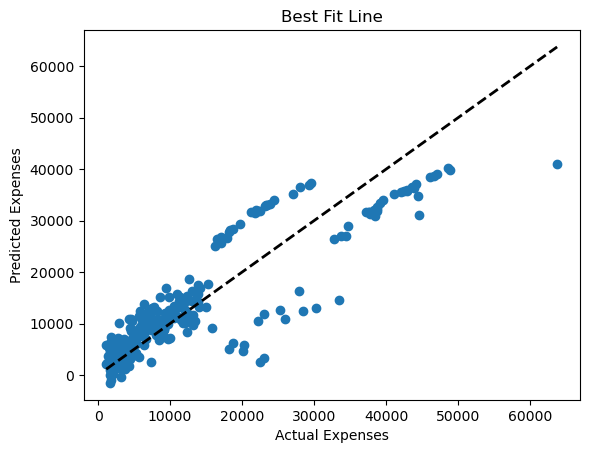

In [121]:
# Print the best fit regression line
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Expenses')
plt.ylabel('Predicted Expenses')
plt.title('Best Fit Line')
plt.show()


## 5.5 Evaluate the model - Find MAE, MSE, R-squared

In [122]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 33600065.35507783
Mean Absolute Error: 4181.561524000792
R^2 Score: 0.7835726930039905


## 5.6 Calculate Adjusted R-squared value using the formula

Here's the Adjusted R-squared formula formatted for Google Colab markdown:

```
Adjusted R-squared (R²ᴀᴅᴊ) = 1 - [(1 - R²) * (n - 1)] / (n - k - 1)
```

### Where:
- **R²** is the R-squared value of the model.
- **n** is the total number of observations.
- **k** is the number of independent variables (predictors) in the model.



In [123]:
# Calculate the number of observations (n) and the number of predictors (p)
n = X_train.shape[0]
p = X_train.shape[1]

# Calculate the Adjusted R-squared value
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Print the Adjusted R-squared value
print(f"Adjusted R^2 Score: {adj_r2}")



Adjusted R^2 Score: 0.7819408188701845


## 5.7 Visualize the predictions

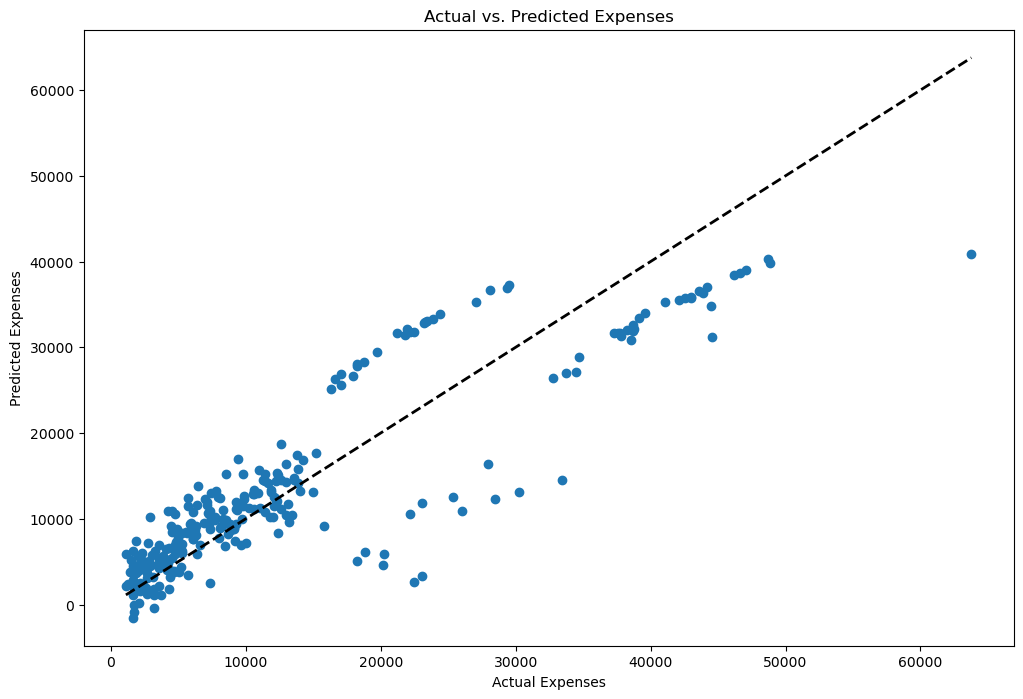

In [124]:
# Visualizing the predictions
# Create a scatter plot of actual vs. predicted expenses
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Expenses')
plt.ylabel('Predicted Expenses')
plt.title('Actual vs. Predicted Expenses')

# Add a line plot representing the ideal case where predicted values equal actual values
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
# Add titles and labels to the plot
plt.xlabel('Actual Expenses')
plt.ylabel('Predicted Expenses')
plt.title('Actual vs. Predicted Expenses')

# Display the plot
plt.show()
